In [1]:
from IPython.core.display import display, HTML, Javascript
html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
        <link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Kadwa">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open Sans">
        <style>
        .title-section {
            font-family: "Kadwa", Arial, sans-serif;
            color: "#6A8CAF";
            letter-spacing: 2px;
            }
        body {
            font-family: "Open Sans", Arial, sans-serif;
            }
        </style>
    </head>
</html>
"""
HTML(html_contents)

<span class="w3-tag w3-large"><b>Crypto Trading Analysis</b></span><br>
<span class="title-section w3-xxxlarge">Technical Indicator vs ML Prediction</span>

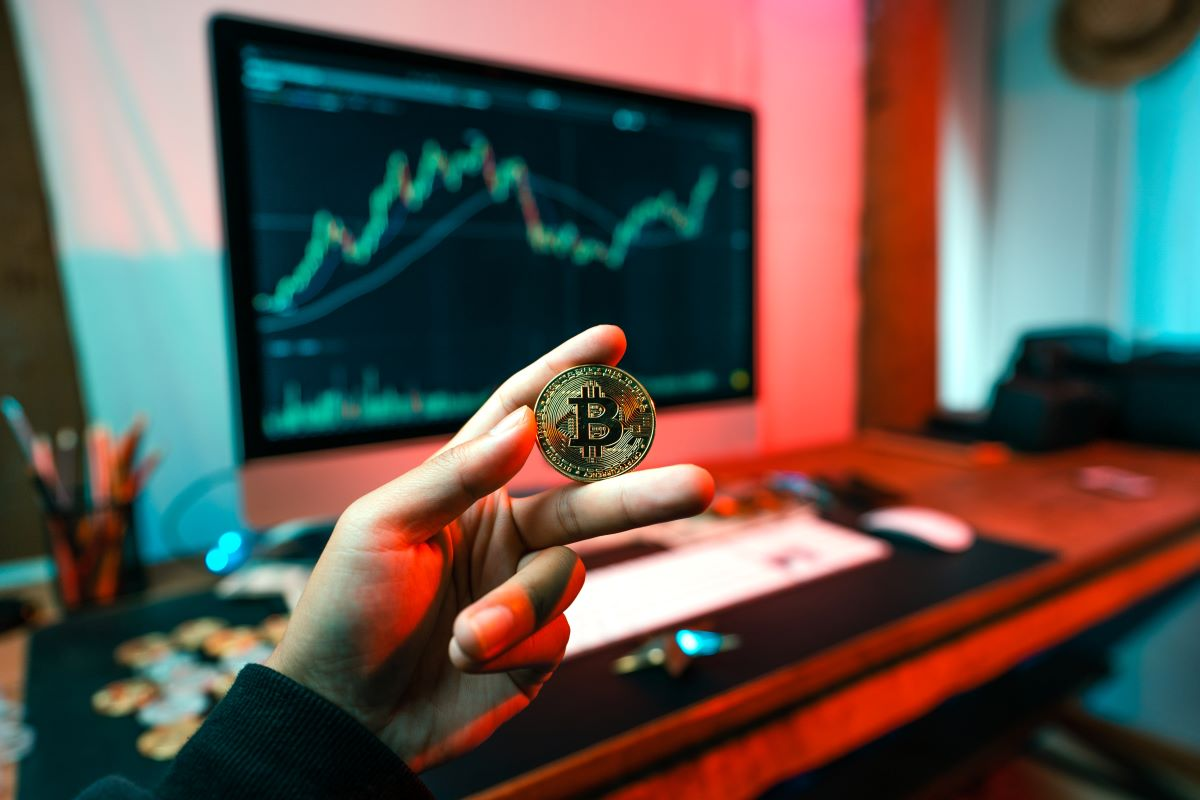<br>
[Image by Art Rachen](https://unsplash.com/photos/sM4r-swmcoY?utm_source=unsplash&utm_medium=referral&utm_content=creditShareLink)

<span class="w3-tag w3-large"><b>WARNING</b></span>

*This notebook is written for [G-Research Crypto Forecasting](https://www.kaggle.com/c/g-research-crypto-forecasting) competition at Kaggle and learning purposes only. Do not use it for real trading with real money. The information provided on this notebook does not constitute investment advice, financial advice, trading advice, or any other sort of advice and you should not treat any of the website's content as such. This notebook does not recommend that any cryptocurrency should be bought, sold, or held by you. Do conduct your own due diligence and consult your financial advisor before making any investment decisions.*

# <span class="title-section w3-xxlarge">Cryptocurrency</span>

According to Wikipedia, a cryptocurrency, crypto-currency, or crypto is a collection of binary data which is designed to work as a medium of exchange. Individual coin ownership records are stored in a ledger, which is a computerized database using strong cryptography to secure transaction records, to control the creation of additional coins, and to verify the transfer of coin ownership. Cryptocurrencies are generally fiat currencies, as they are not backed by or convertible into a commodity. Some crypto schemes use validators to maintain the cryptocurrency. In a proof-of-stake model, owners put up their tokens as collateral. In return, they get authority over the token in proportion to the amount they stake. Generally, these token stakers get additional ownership in the token over time via network fees, newly minted tokens or other such reward mechanisms. Cryptocurrency does not exist in physical form (like paper money) and is typically not issued by a central authority. Cryptocurrencies typically use decentralized control as opposed to a central bank digital currency (CBDC). When a cryptocurrency is minted or created prior to issuance or issued by a single issuer, it is generally considered centralized. When implemented with decentralized control, each cryptocurrency works through distributed ledger technology, typically a blockchain, that serves as a public financial transaction database.

Bitcoin, first released as open-source software in 2009, is the first decentralized cryptocurrency. Since the release of bitcoin, many other cryptocurrencies have been created.<a href="#f4" id="a1"><sup>[2]</sup></a>

# <span class="title-section w3-xxlarge">Technical Indicator</span>

Technical Analysis (TA) is a popular technique to evaluate stocks or coins based on similar data points and elements. This articulation will tell you about TA while also delving into trading indicators before we conclude with the best indicators for you. 

The price charts of any coin/stock are free for diverse interpretations. Hence, during TA, technicals like support levels can go for a toss as every trader with their prejudice intact can draw support lines at different price points. Support and resistance zones are vital and drawing them should never boil down to destiny.

To remove this uncertainty and provide a level-playing field, technical indicators are used. They are mathematical calculations used to plot lines on the price chart to identify trends and key price points of a coin/stock.
Think of trading indicators as a map that guides you through the maze of ambiguity. Using them in coalition with a bit of market psychology and understanding of risk will enable you to make better trading decisions. Given their quantitative nature, you can also automate your trades using these indicators.<a href="#f4" id="a1"><sup>[3]</sup></a>

In [53]:
# from matplotlib.finance import candlestick2_ohlc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Install finplot library
# !pip -q install mplfinance
# import mplfinance as mpf

In [54]:
# load dataset
train = pd.read_csv("../input/g-research-crypto-forecasting/train.csv")
asset_details = pd.read_csv("../input/g-research-crypto-forecasting/asset_details.csv")
df_test = pd.read_csv("../input/g-research-crypto-forecasting/example_test.csv")
mapping = dict(asset_details[['Asset_ID', 'Asset_Name']].values)
train["Asset name"] = train["Asset_ID"].map(mapping)

In [60]:
df_train = train
df_asset_details = asset_details

In [62]:
asset_details.sort_values(by=['Weight'], inplace=True, ascending=False)

Bitcoin has highest weight is the top on the list, followed by Ethereum. We will focus on the top two crypto currencies.

In [63]:
temp = train.reset_index(drop = True) 
temp['TIME'] = pd.to_datetime(temp['timestamp'], unit='s')

In [64]:
##########TRANSACTIONS##########
temp['Year'] = temp['TIME'].dt.year
temp.columns =[column.replace(" ", "_") for column in temp.columns]
temp.dropna()[['Open', 'High', 'Low', 'Close', 'Volume','VWAP']]
volume_yr = temp.groupby(['Year','Asset_name'])['Volume'].max().reset_index()
volume_yr = volume_yr.query("Year == 2021")

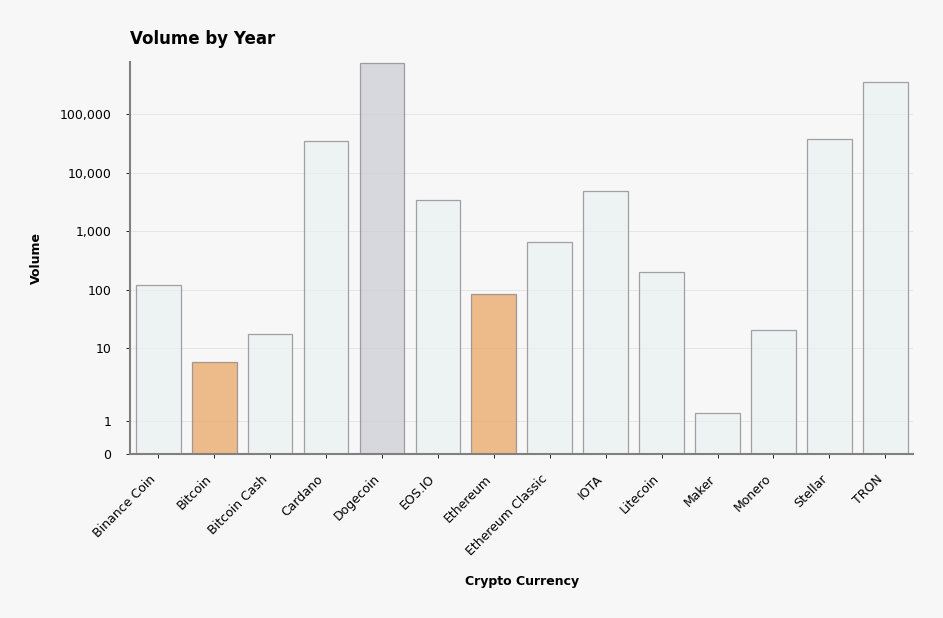

In [24]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(3, 5), facecolor='#F7F7F7')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

background_color = "#F7F7F7"
color_map = ["#E8F0F2" for _ in range(20)]
color_map[4] = "#C9CCD5" #F2A154 79B4B7
color_map[1] = "#F2A154"
color_map[6] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

for s in ['bottom','left']:
  ax0.spines[s].set_linewidth(0.5)
  ax0.spines[s].set_color('grey')
    
#graph
ax0 = sns.barplot(ax=ax0, y=volume_yr['Volume']/1000, x=volume_yr['Asset_name'], 
                      zorder=2, linewidth=0.3, edgecolor="#7F7C82", 
                      orient='v', saturation=0.9, alpha=0.7)
ax0.grid(which='major', axis='y', zorder=0, color='#CDD0CB', linewidth=0.2, alpha=0.5)
ax0.set_yscale('symlog')

#format axis
ax0.set_ylabel("Volume",fontsize=3, weight='semibold')
ax0.set_xlabel("Crypto Currency",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.2, length=1)
plt.setp( ax0.xaxis.get_majorticklabels(), rotation=45, ha="right" )

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1+2000000, 'Volume by Year', fontsize=4, ha='left', va='top', weight='semibold')

y_format = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax0.yaxis.set_major_formatter(y_format)

plt.show()

New comer crypto currency Dodgecoin, has highest volume transaction this year, while the two most popular currencies Bitcoin and Etherium are a lot less volumes.

# <span class="title-section w3-xxlarge">Bitcoin Performance</span>
Now let us see how is the performance of Bitcoin from the data. The given data is from 2018 until end of 2020 last year, lowest timeframe is in seconds. For our analysis let's assume we will trade on daily time frame or longer. We use simple technical indicators that commonly use for technical analysis: Simple Moving Average (SMA) and Relative Strength Index (RSI).

# <span class="title-section w3-xxlarge">Moving Average</span>
Moving averages simplify and smoothen price fluctuations, reducing the noise and giving you a better idea of which direction the market is going, and where it might potentially go. Reducing noise from a chart will give you a much clearer picture of what is happening.

MA’s are calculated by summing up the previous data points, or candles, which are then divided by the number of points. What does this mean?

A 20 MA is derived from summing up the previous 20 periods, divided by 20.
A 100 MA is derived from summing up the previous 100 periods, divided by 100.

## <span class="title-section w3-xxlarge">Simple Moving Average (SMA)</span>

The Simple Moving Average, or SMA line, is calculated based on the closing price of a period. A ‘period’ means a candle. For example, the closing price of 3 periods or candles is summed up and then divided by 3. Every period in the calculation has the same weight.

             An example: we have 3 periods, $50, $45, and $60.
             The formula is: 50 + 45 + 60 = 155 / 3 (the number of periods) = 51.66 as a 3 SMA.

The Simple Moving Average is very smooth and is at its strongest as a long-term indicator, on any timeframe.

In [48]:
#Extract Bitcoin data
temp = train.query("Asset_ID == 1").reset_index(drop = True) # bitcoin
temp['TIME'] = pd.to_datetime(temp['timestamp'], unit='s')

all_data = temp.groupby(['Asset_ID', 'Asset name']).resample('D', on='TIME', origin='start').agg(
    {"Open": "first", 
     "Close": "last", 
     "Low": "min", 
     "High": "max",
     "Volume": "last",
     "VWAP": "max"
    }
).dropna()[['Open', 'High', 'Low', 'Close', 'Volume','VWAP']]

all_data=all_data.reset_index()
all_data=all_data.set_index('TIME')

UndefinedVariableError: name 'Asset_ID' is not defined

In [49]:
start = dt.datetime.strptime('2018-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2025-09-20', '%Y-%m-%d')
selected_data = all_data.loc[start:end,['Open','High','Low','Close', 'VWAP', 'Volume']]

In [27]:
# mpf.plot(selected_data, # the dataframe containing the OHLC (Open, High, Low and Close) data
#          type='candle', # use candlesticks 
#          volume=True, # also show the volume
#          mav=(5, 15), # use two different moving averages
#          figratio=(3,1), # set the ratio of the figure
#          style='yahoo',  # choose the yahoo style
#          title='Bitcoin Daily'
#          )

We can see that by using simple technical indicators on daily trading, we can get nice profits. In 2020 shows a significant price increases started around May, despite of the pandemic of Covid-19. We see the spike of Covid-19 was during Marc 2020 then back to rise again during pandemic.

# <span class="title-section w3-xxlarge">Relative Strength Index (RSI)</span>
RSI is one of the most common momentum indicator aimed at quantifies price changes and the speed of such change. The most elementary way of using the index is buying when an asset or cryptocurrency is oversold, and selling when it’s overbought.

Generally, an asset is overbought when the RSI value is 70% or above, and oversold when the value is 30% or below. When an asset is overbought, it’s a clear signal of a looming downtrend. On the flip side, oversold security is a sign of an incoming upward trend. In this case, the weakness of the asset is running out of steam and it’s gathering momentum to climb higher. 

RSI is the source of diverse trend trading strategies. One other common trading strategy is buying or selling when RSI hits the midline or crosses it. This depicts the start of a new trend. 

When the RSI is above 50, a bullish trend is brewing. When it’s below 50, it’s the start of a bearish trend. 

While using the midline cross-trading strategy, traders frequently use the ratios of 70/30, 50/50 or 60/40 as resistance and support in bullish or bearish trends. 

When the resistance suffers a hit, a trend reversal may occur. Hence, traders should spring to action accordingly.

In [65]:
#RSI
all_data['Diff'] = all_data.groupby('Asset_ID')['Close'].transform(lambda x: x.diff())
all_data['Up'] = all_data['Diff']
all_data.loc[(all_data['Up']<0), 'Up'] = 0

all_data['Down'] = all_data['Diff']
all_data.loc[(all_data['Down']>0), 'Down'] = 0 
all_data['Down'] = abs(all_data['Down'])

all_data['avg_5up'] = all_data.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=5).mean())
all_data['avg_5down'] = all_data.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=5).mean())

all_data['avg_15up'] = all_data.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=15).mean())
all_data['avg_15down'] = all_data.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=15).mean())

all_data['RS_5'] = all_data['avg_5up'] / all_data['avg_5down']
all_data['RS_15'] = all_data['avg_15up'] / all_data['avg_15down']

all_data['RSI_5'] = 100 - (100/(1+all_data['RS_5']))
all_data['RSI_15'] = 100 - (100/(1+all_data['RS_15']))

all_data['RSI_ratio'] = all_data['RSI_5']/all_data['RSI_15']

In [66]:
start = dt.datetime.strptime('2021-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2025-09-20', '%Y-%m-%d')
selected_data = all_data.loc[start:end,['Open','High','Low','Close','RSI_15', 'VWAP', 'Volume']]
# apd = mpf.make_addplot(selected_data['RSI_15'],panel=2,color='lime',ylim=(10,90),secondary_y=True)
# mpf.plot(selected_data, # the dataframe containing the OHLC (Open, High, Low and Close) data
#          type='candle', # use candlesticks 
#          volume=True, # also show the volume
#          mav=(5,15), # use two different moving averages
#          figratio=(3,1), # set the ratio of the figure
#          addplot=apd, # RSI
#          style='yahoo',  # choose the yahoo style
#          title='Bitcoin Daily (RSI)' # title
#          )

The chart shows the best performance of Bitcoin this year. By combining SMA and RSI together we have a better indicators for trading decision. The technical indicator tells that we only buy when the the blue line (SMA_5) is above red line (SMA_15) and RSI is above 80, and sell when the red line is below the green line and RSI is below 20.

You see the price drop in January this year, then rebound back and continue rise and reach all time high at April. RSI indicator reach its lowest below 20 in end of April. Fast SMA (5) crossing the long SMA (15) happened few times, where you can buy, and sell when SMA (5) crossing down the SMA (15). RSI helps tells the confirmation to buy or sell.

# <span class="title-section w3-xxlarge">Ethereum Performance</span>

Now let's do the same for Ethereum and see its performance.

In [67]:
#Extract Ethereum data
temp1 = train.query("Asset_ID == 6").reset_index(drop = True) # Etherium
temp1['TIME'] = pd.to_datetime(temp1['timestamp'], unit='s')

all_data1 = temp1.groupby(['Asset_ID', 'Asset name']).resample('D', on='TIME', origin='start').agg(
    {"Open": "first", 
     "Close": "last", 
     "Low": "min", 
     "High": "max",
     "Volume": "last",
     "VWAP": "max"
    }
).dropna()[['Open', 'High', 'Low', 'Close', 'Volume','VWAP']]

all_data1=all_data1.reset_index()
all_data1=all_data1.set_index('TIME')

In [68]:
#RSI
all_data1['Diff'] = all_data1.groupby('Asset_ID')['Close'].transform(lambda x: x.diff())
all_data1['Up'] = all_data1['Diff']
all_data1.loc[(all_data1['Up']<0), 'Up'] = 0

all_data1['Down'] = all_data1['Diff']
all_data1.loc[(all_data1['Down']>0), 'Down'] = 0 
all_data1['Down'] = abs(all_data1['Down'])

all_data1['avg_5up'] = all_data1.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=5).mean())
all_data1['avg_5down'] = all_data1.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=5).mean())

all_data1['avg_15up'] = all_data1.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=15).mean())
all_data1['avg_15down'] = all_data1.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=15).mean())

all_data1['RS_5'] = all_data1['avg_5up'] / all_data1['avg_5down']
all_data1['RS_15'] = all_data1['avg_15up'] / all_data1['avg_15down']

all_data1['RSI_5'] = 100 - (100/(1+all_data1['RS_5']))
all_data1['RSI_15'] = 100 - (100/(1+all_data1['RS_15']))

all_data1['RSI_ratio'] = all_data1['RSI_5']/all_data1['RSI_15']

In [69]:
start = dt.datetime.strptime('2021-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2025-09-20', '%Y-%m-%d')
selected_data1 = all_data1.loc[start:end,['Open','High','Low','Close','RSI_15', 'VWAP', 'Volume']]
# apd = mpf.make_addplot(selected_data1['RSI_15'],panel=2,color='lime',ylim=(10,90),secondary_y=True)
# mpf.plot(selected_data1, # the dataframe containing the OHLC (Open, High, Low and Close) data
#          type='candle', # use candlesticks 
#          volume=True, # also show the volume
#          mav=(5,15), # use two different moving averages
#          figratio=(3,1), # set the ratio of the figure
#          addplot=apd, # RSI
#          style='yahoo',  # choose the yahoo style
#          title='Ethereum Daily' # title
#          )

# <span class="title-section w3-xxlarge">LSTM Prediction</span>

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video).

LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series.
A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.

LSTMs are very powerful in sequence prediction problems because they’re able to store past information. This is important in our case because the previous price of a stock is crucial in predicting its future price.

## <span class="title-section w3-xlarge">Bitcoin LSTM prediction</span>

In [70]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')

### <span class="title-section w3-large">Split the data.</span>

In [71]:
data = selected_data.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data itno x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

### <span class="title-section w3-large">Build the LSTM Model.</span>

In [72]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [73]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
# Create new array containing scaled values from index 1028 to 1359
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# convert data to numpy array
x_test = np.array(x_test)

# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean square error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )

151/151 [==============================] - 7s 27ms/step - loss: 0.0272


### <span class="title-section w3-large">Plot the data.</span>

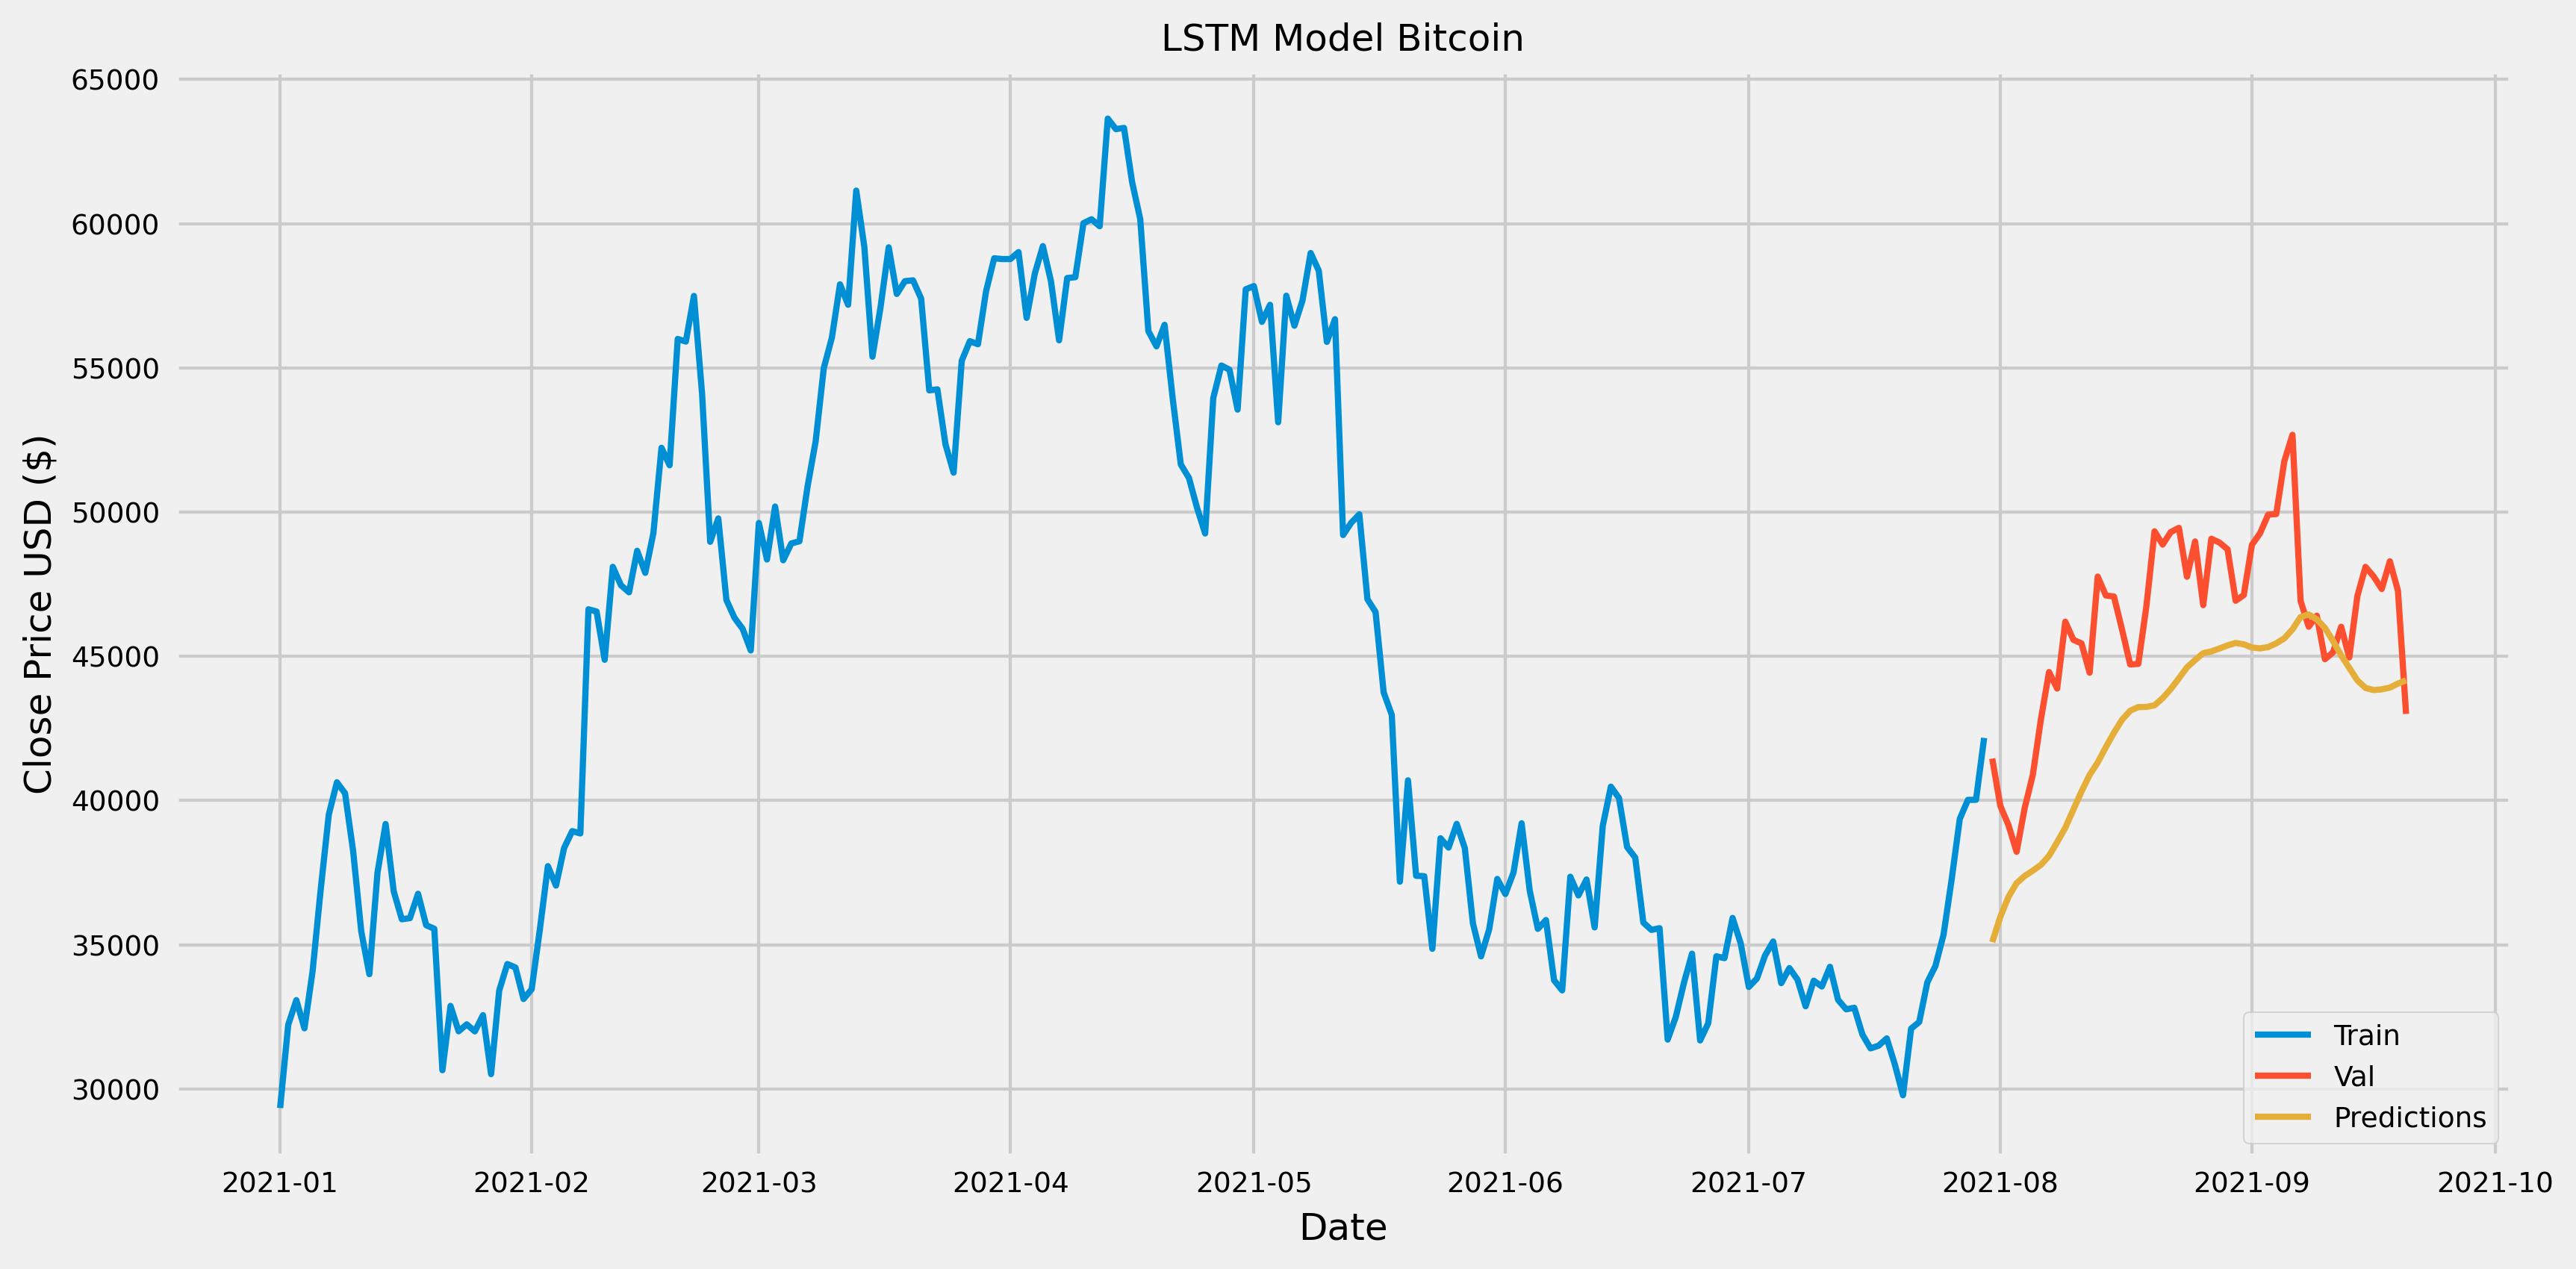

In [74]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(12,6))
plt.title('LSTM Model Bitcoin', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.tick_params(labelsize=9, width=0.2, length=1)

plt.plot(train['Close'], linewidth=2.0)
plt.plot(valid[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right', fontsize=9)
plt.show()

### <span class="title-section w3-large">Prediction vs Actual Price</span><br>
We see from the chart above, price direction prediction whether the price will be up or down. Next, let's check the accuracy of LSTM prediction. We can check the actual price directly from Yahoo!

In [ ]:
# import pandas_datareader as web
# # Get the quote
# btc_quote = web.DataReader('BTC-USD', data_source='yahoo', start='2018-01-01', end='2021-09-20')
# # Create a new dataframe
# new_df = btc_quote.filter(['Close'])
# # Get the last 60 days closing price
# last_60_days = new_df[-60:].values
# # Scale the data to be values between 0 and 1
# last_60_days_scaled = scaler.transform(last_60_days)
# #Create an empty list
# X_test = []
# # Append the past 60 days
# X_test.append(last_60_days_scaled)
# # convert to numpy array
# X_test = np.array(X_test)
# # Reshape
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# # Get the predicted scaled price
# pred_price = model.predict(X_test)
# # undo the scaling
# pred_price = scaler.inverse_transform(pred_price)[0]
# btc_quote2 = web.DataReader('BTC-USD', data_source='yahoo', start='2021-09-20', end='2021-09-20')
# actual_price = btc_quote2['Close'][0]
# actual_price
# accuracy = ((pred_price-actual_price)/actual_price)*100
# print('Prediction close price at 9-20-2021: $', pred_price, sep='')
# print('Actual price at 9-20-2021: $', actual_price, sep='')
# print('Accuracy: ', accuracy, '%', sep='')

The result is +/- 10.7% precision compare to actual close price. Or can I say the accuracy is 90%?  When you close your trading, you will get the actual price. So it is not about the accuracy in terms of dollars, but more importantly help us indicate the direction of how the market is going in the future.

Now, let's see how much gain do we get.

# <span class="title-section w3-xxlarge">Ethereum LSTM prediction</span>
Now let's do the same LSTM modeling for Ethereum as we did earlier for Bitcoin.

In [ ]:
data1 = selected_data1.filter(['Close'])
dataset1 = data1.values
training_data_len1 = math.ceil(len(dataset1) * .8)
# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data1 = scaler.fit_transform(dataset1)
# Create the training data set
# Create the scaled training data set
train_data1 = scaled_data1[0:training_data_len1, :]

# Split the data itno x_train and y_train data sets
x_train1 = []
y_train1 = []

for i in range(60, len(train_data1)):
    x_train1.append(train_data1[i-60:i,0])
    y_train1.append(train_data1[i,0])
    
# Convert the x_train and y_train to numpy arrays
x_train1, y_train1 = np.array(x_train1), np.array(y_train1)
# Reshape the data
x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1], 1))
# x_train.shape

# Build the LSTM Model
model1 = Sequential()
model1.add(LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], 1)))
model1.add(LSTM(50, return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))

In [ ]:
# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model1.fit(x_train1, y_train1, batch_size=1, epochs=1)

In [ ]:
# Create the testing data set
# Create new array containing scaled values from index 1028 to 1359
test_data1 = scaled_data1[training_data_len1 - 60: , :]

# Create the data sets x_test and y_test
x_test1 = []
y_test1 = dataset1[training_data_len1: , :]
for i in range(60, len(test_data1)):
    x_test1.append(test_data1[i-60:i, 0])
    
# convert data to numpy array
x_test1 = np.array(x_test1)

# reshape the data
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))

# Get the models predicted price values
predictions1 = model1.predict(x_test1)
predictions1 = scaler.inverse_transform(predictions1)

# Get the root mean square error (RMSE)
rmse1 = np.sqrt( np.mean( predictions1 - y_test1 )**2 )

In [ ]:
# Plot the data
train1 = data1[:training_data_len1]
valid1 = data1[training_data_len1:]
valid1['Predictions'] = predictions1

# Visualize the data
plt.figure(figsize=(12,6))
plt.title('Model', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.tick_params(labelsize=9, width=0.2, length=1)

plt.plot(train1['Close'], linewidth=2.0)
plt.plot(valid1[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right', fontsize=9)
plt.show()

We see that the prediction line (green line) for Ethereum is aligned with the trend. If we bought the ethereum in early August at around USD21,000, then from this prediction we can sell it at above USD30,000, we can get a decent profit of around 30% within less than two months. We have tested the LTSM prediction modeling to Bitcoin and Ethereum and show that this model works well for crypto currency prediction. 

If we compare with technical indicator which help us in making trading decision, the machine learning approach provide us more confident prediction. We see the visualization prediction in the future where the price direction in the future. While on the other hand technical indicator will give us the signal much closer time frame before the direction start changing its direction.

The two cryptos analysis shows similar result with acceptable predictions. Then we can assure that this LSTM model should works well with other crypto currencies. So next we will do same steps to get the best estimator.

# Price prediction for all assets

In [75]:
temp = df_train.reset_index(drop = True) 
temp['TIME'] = pd.to_datetime(temp['timestamp'], unit='s')
start = dt.datetime.strptime('2025-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2021-09-20', '%Y-%m-%d')
train_data = temp.loc[temp["TIME"].between(start, end)]

In [78]:
# train test split df_train into 80% train rows and 20% valid rows

def get_Xy_and_model_for_asset(df_train, asset_id):
    df = df_train[df_train["Asset_ID"] == asset_id]
    df = df.filter(['Close'])
    df = df.values
    training_data_len = math.ceil(len(df) * .001)
    # Scale the Data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(df)
    # Create the training data set
    # Create the scaled training data set
    train_data = scaled_data[0:training_data_len, :]

    # Split the data itno x_train and y_train data sets
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i,0])
        y_train.append(train_data[i,0])

    # Convert the x_train and y_train to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)
    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    # x_train.shape
    # Build the LSTM Model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1) # LSTM model
    return x_train, y_train, model

Xs = {}
ys = {}
models = {}

for asset_id, asset_name in zip(df_asset_details['Asset_ID'], df_asset_details['Asset_Name']):
    print(f"Training model for {asset_name:<16} (ID={asset_id:<2})")
    X, y, model = get_Xy_and_model_for_asset(train_data, asset_id)       
    try:
        Xs[asset_id], ys[asset_id], models[asset_id] = X, y, model
    except: 
        Xs[asset_id], ys[asset_id], models[asset_id] = None, None, None

Training model for Bitcoin          (ID=1 )


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [79]:
sup_train = pd.read_csv('../input/g-research-crypto-forecasting/supplemental_train.csv', 
                 usecols=['Close', 'Target', 'Asset_ID','timestamp'], dtype={'Asset_ID': 'int8'})
sup_train['datetime'] = pd.to_datetime(sup_train['timestamp'], unit='s')
sup_train = sup_train.set_index('datetime').drop('timestamp', axis=1)
sup_train = sup_train[(sup_train.index.year == 2021) & (sup_train.index.month > 5)]
sup_trains = {asset_id: sup_train[sup_train['Asset_ID'] == asset_id].resample('1min').interpolate().copy() for asset_id in sup_train['Asset_ID'].unique()}
del sup_train

## <span class="title-section w3-xlarge">Submission</span><br>
Everything looks good. It is now the time to submit the result.

In [82]:
import gresearch_crypto
env = gresearch_crypto.make_env()
iter_test = env.iter_test()

Exception: You can only call `make_env()` once.

In [83]:
df = pd.read_csv('../input/g-research-crypto-forecasting/supplemental_train.csv', 
                 usecols=['Target', 'Asset_ID','timestamp'], dtype={'Asset_ID': 'int8'})
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.set_index('datetime').drop('timestamp', axis=1)
df = df[(df.index.year == 2021) & (df.index.month > 5)]
dfs = {asset_id: df[df['Asset_ID'] == asset_id].resample('1min').interpolate().copy() for asset_id in df['Asset_ID'].unique()}
del df
for df_test, df_pred in iter_test:
    df_test['datetime'] = pd.to_datetime(df_test['timestamp'], unit='s')
    for _, row in df_test.iterrows():
        try:
            df = dfs[row['Asset_ID']]
            closest_train_sample = df.iloc[df.index.get_loc(row['datetime'], method='nearest')]
            df_pred.loc[df_pred['row_id'] == row['row_id'], 'Target'] = closest_train_sample['Target']
        except:
            df_pred.loc[df_pred['row_id'] == row['row_id'], 'Target'] = 0
    df_pred['Target'] = df_pred['Target'].fillna(0)
    env.predict(df_pred)

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.


<span class="title-section w3-xlarge">Thank you for visiting this notebook!</span>

<p>If you like this notebook, you know it is <span class="w3-tag w3-large"><b>FREE</b></span> to click the upvote button.</p>
<p>Thanks for reading this notebook. If you have any feedback or comments please write it down the comment section below. Let's learn technical analysis, algo trading and machine learning for crypto trading together!</p>

Check the price if the prediction is correct!

## <span class="title-section w3-xlarge">References:</span>
[Wikipedia: Cryptocurrency](https://en.wikipedia.org/wiki/Cryptocurrency)<br>
[Most Commonly-Used Periods in Creating Moving Average (MA) Lines](https://www.investopedia.com/ask/answers/122414/what-are-most-common-periods-used-creating-moving-average-ma-lines.asp)<br>
[Implementation of Technical Indicators into a Machine Learning framework for Quantitative Trading](https://towardsdatascience.com/implementation-of-technical-indicators-into-a-machine-learning-framework-for-quantitative-trading-44a05be8e06)<br>
[AlgoTrading using Technical Indicator and ML models](https://www.analyticsvidhya.com/blog/2021/01/algotrading-using-technical-indicator-and-ml-models/)<br>
[What Is RSI and How Do You Apply It to Crypto Trading?](https://learn.bybit.com/trading/what-is-rsi-and-how-do-you-apply-it-to-crypto-trading/)<br>
[Technical Analysis 101: The Best Technical Indicators for Crypto and Stocks](https://coinmarketcap.com/alexandria/article/technical-analysis-101-the-best-technical-indicators-for-crypto-and-stocks)<br>
[Simple Sequence Prediction With LSTM](https://medium.com/@nutanbhogendrasharma/simple-sequence-prediction-with-lstm-69ff0f4d57cd)<br>
[How to Develop LSTM Models for Time Series Forecasting](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/)